In [1]:
import requests

url1 = "https://ghoapi.azureedge.net/api/NCD_BMI_30C"
url2 = "https://ghoapi.azureedge.net/api/NCD_BMI_PLUS2C"
url3 = "https://ghoapi.azureedge.net/api/NCD_BMI_18C"
url4 = "https://ghoapi.azureedge.net/api/NCD_BMI_MINUS2C"

response1 = requests.get(url1)
data_obesity_adult = response1.json()


response2 = requests.get(url2)
data_obesity_child = response1.json()

response3 = requests.get(url3)
data_uweight_adult = response1.json()

response4 = requests.get(url4)
data_uweight_child = response1.json()


In [2]:
import pandas as pd

df_obesity_adult = pd.DataFrame(data_obesity_adult['value'])
df_obesity_child = pd.DataFrame(data_obesity_child['value'])
df_uweight_adult = pd.DataFrame(data_uweight_adult['value'])
df_uweight_child = pd.DataFrame(data_uweight_child['value'])

In [3]:
#adding age_group column

df_obesity_adult["age_group"] = "adults"
df_obesity_child["age_group"] = "children"
df_uweight_adult["age_group"] = "adults"
df_uweight_child["age_group"] = "children"

In [4]:
#combining the dataframes

df_obesity1 = pd.concat([df_obesity_adult, df_obesity_child],ignore_index=True)
df_malnutrition1 = pd.concat([df_uweight_adult, df_uweight_child],ignore_index=True)

In [5]:
df_obesity = df_obesity1[(df_obesity1["TimeDim"]>=2012) & (df_obesity1["TimeDim"]<=2022)]
df_malnutrition = df_malnutrition1[(df_malnutrition1["TimeDim"]>=2012) & (df_malnutrition1["TimeDim"]<=2022)]

  #df_obesity = df_obesity1[df_obesity1["TimeDim"].between(2012,2022)

In [6]:
#columns to Retain
columns_to_retain = ["ParentLocation","Dim1","TimeDim","Low","High","NumericValue","SpatialDim","age_group"]

In [7]:
df_obesity = df_obesity[columns_to_retain].copy()
df_malnutrition = df_malnutrition[columns_to_retain].copy()

In [8]:
#TimeDim → Year ,Dim1 → Gender, NumericValue → Mean_Estimate ,Low → LowerBound ,High → UpperBound ,ParentLocation → Region, SpatialDim → Country

df_obesity.rename(columns={
    "TimeDim": "Year",
    "Dim1": "Gender",
    "NumericValue": "Mean_Estimate",
    "Low": "LowerBound",
    "High": "UpperBound",
    "ParentLocation": "Region",
    "SpatialDim": "Country"
},inplace=True)


df_malnutrition.rename(columns={
    "TimeDim": "Year",
    "Dim1": "Gender",
    "NumericValue": "Mean_Estimate",
    "Low": "LowerBound",
    "High": "UpperBound",
    "ParentLocation": "Region",
    "SpatialDim": "Country"
},inplace=True)


In [9]:
df_obesity["Gender"] = df_obesity["Gender"].replace({
    "SEX_MLE": "Male",
    "SEX_FMLE": "Female",
    "SEX_BTSX": "Both"
})


df_malnutrition["Gender"] = df_malnutrition["Gender"].replace({
    "SEX_MLE": "Male",
    "SEX_FMLE": "Female",
    "SEX_BTSX": "Both"
})


In [10]:
df_obesity["Country"].unique()

array(['MLI', 'IRL', 'LTU', 'KNA', 'TUR', 'SDN', 'HTI', 'LBR', 'LUX',
       'EGY', 'MMR', 'TCD', 'LAO', 'ITA', 'MKD', 'GRL', 'ARG', 'TKL',
       'NRU', 'MAR', 'AZE', 'BRA', 'BHS', 'MDA', 'AND', 'UGA', 'SWE',
       'EUR', 'PRT', 'BLZ', 'COG', 'ZWE', 'GNQ', 'DMA', 'CPV', 'ERI',
       'JAM', 'GAB', 'COD', 'POL', 'CRI', 'VNM', 'PAN', 'SLE', 'SGP',
       'BIH', 'AUT', 'WB_HI', 'ARE', 'CZE', 'NIC', 'WSM', 'FJI', 'JOR',
       'AUS', 'SAU', 'NER', 'AGO', 'GEO', 'ROU', 'ECU', 'PSE', 'PYF',
       'IND', 'PHL', 'ZMB', 'BDI', 'TLS', 'GNB', 'PLW', 'AFG', 'YEM',
       'URY', 'MUS', 'DZA', 'GMB', 'TUV', 'DEU', 'LBY', 'BEN', 'OMN',
       'FIN', 'WB_LI', 'KIR', 'CUB', 'DOM', 'BMU', 'GBR', 'LVA', 'RWA',
       'CYP', 'BGR', 'ISL', 'ISR', 'KHM', 'SEAR', 'ESP', 'BWA', 'ASM',
       'BGD', 'UKR', 'MNG', 'LSO', 'KOR', 'AMR', 'BHR', 'MLT', 'SSD',
       'VUT', 'FRA', 'VEN', 'BOL', 'BEL', 'JPN', 'KEN', 'MDV', 'NIU',
       'SVK', 'LCA', 'KWT', 'GRD', 'MRT', 'BLR', 'PAK', 'ETH', 'CAF',
       'PER', '

In [11]:
pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 27.7 MB/s eta 0:00:00


In [12]:
special_cases = {
    'GLOBAL': 'Global',
    'WB_LMI': 'Low & Middle Income',
    'WB_HI': 'High Income',
    'WB_LI': 'Low Income',
    'EMR': 'Eastern Mediterranean Region',
    'EUR': 'Europe',
    'AFR': 'Africa',
    'SEAR': 'South-East Asia Region',
    'WPR': 'Western Pacific Region',
    'AMR': 'Americas Region',
    'WB_UMI': 'Upper Middle Income'
}


In [13]:
import pycountry

def code_to_country(code):
    country = pycountry.countries.get(alpha_3=code)
    if country is not None:
        return country.name

    if code in special_cases:
        return special_cases[code]
    return code


In [14]:
df_obesity["Country"] = df_obesity["Country"].apply(code_to_country)
df_malnutrition["Country"] = df_malnutrition["Country"].apply(code_to_country)

In [15]:
df_obesity["age_group"] = df_obesity["age_group"].replace("adults","adult")
df_malnutrition["age_group"] = df_malnutrition["age_group"].replace({"adults":"Adolescent","children":"child"})


In [16]:
df_obesity["CI_Width"] = df_obesity["UpperBound"] - df_obesity["LowerBound"]
df_malnutrition["CI_Width"] = df_malnutrition["UpperBound"] - df_malnutrition["LowerBound"]


In [17]:
def get_obesity_level(x):
    if x >= 30:
        return "High"
    elif 25 <= x < 30:
        return "Moderate"
    else:
        return "Low"

df_obesity["obesity_level"] = df_obesity["Mean_Estimate"].apply(get_obesity_level)


In [18]:
def get_malnutrition_level(x):
    if x >= 20:
        return "High"
    elif 10 <= x < 20:
        return "Moderate"
    else:
        return "Low"

df_malnutrition["malnutrition_level"] = (df_malnutrition["Mean_Estimate"].apply(get_malnutrition_level))


# **EDA**

In [19]:
#Understanding the shape and structure of the data
df_obesity.shape

(13860, 10)

In [20]:
df_malnutrition.shape

(13860, 10)

In [21]:
#missing values in the dataframe
df_obesity.isna().sum()

,0
Region,726
Gender,0
Year,0
LowerBound,0
UpperBound,0
Mean_Estimate,0
Country,0
age_group,0
CI_Width,0
obesity_level,0


In [22]:
df_malnutrition.isna().sum()

,0
Region,726
Gender,0
Year,0
LowerBound,0
UpperBound,0
Mean_Estimate,0
Country,0
age_group,0
CI_Width,0
malnutrition_level,0


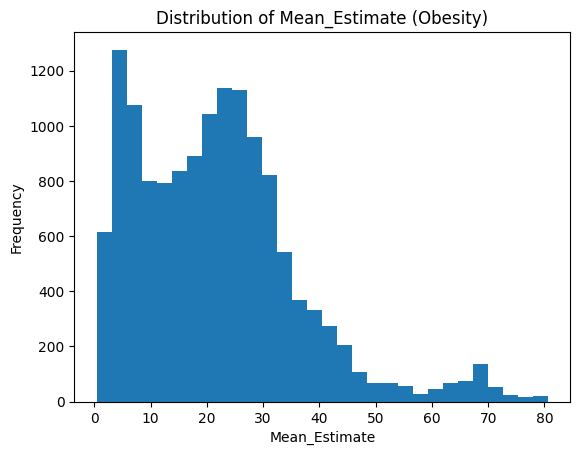

In [23]:
import matplotlib.pyplot as plt
plt.hist(df_obesity["Mean_Estimate"], bins=30)
plt.title("Distribution of Mean_Estimate (Obesity)")
plt.xlabel("Mean_Estimate")
plt.ylabel("Frequency")
plt.show()


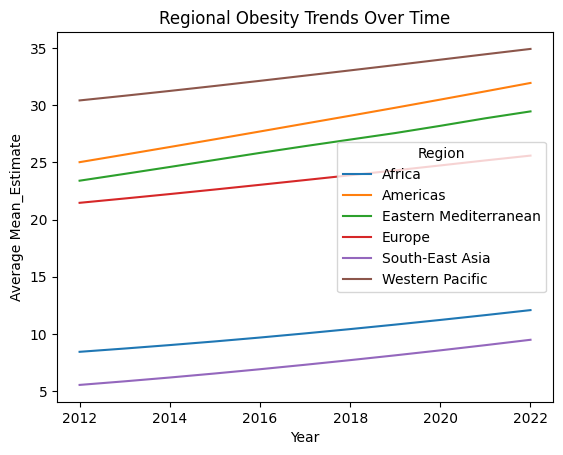

In [24]:
#years and region
year_region = (
    df_obesity
    .groupby(["Year", "Region"])["Mean_Estimate"]
    .mean()
    .unstack()
)

year_region.plot()
plt.xlabel("Year")
plt.ylabel("Average Mean_Estimate")
plt.title("Regional Obesity Trends Over Time")
plt.show()



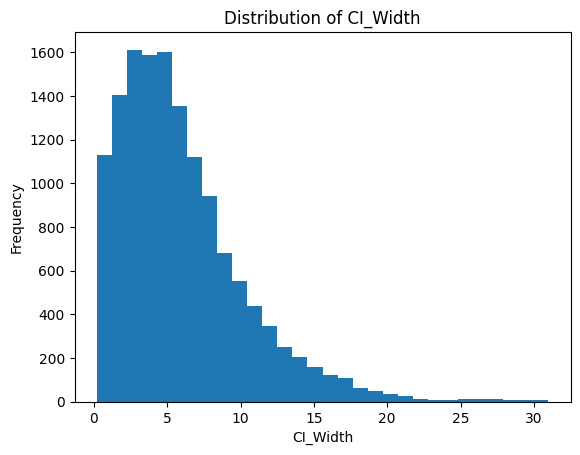

In [25]:
plt.hist(df_obesity["CI_Width"], bins=30)
plt.xlabel("CI_Width")
plt.ylabel("Frequency")
plt.title("Distribution of CI_Width")
plt.show()


In [26]:
df_obesity

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,obesity_level
0,Africa,Both,2022,7.699381,12.761527,9.952872,Mali,adult,5.062146,Low
4,Europe,Male,2014,25.753903,31.737372,28.709593,Ireland,adult,5.983469,Moderate
19,Europe,Female,2022,23.676629,41.304097,32.159114,Lithuania,adult,17.627468,High
21,Americas,Both,2014,34.908265,46.248028,40.481207,Saint Kitts and Nevis,adult,11.339763,High
24,Europe,Male,2021,21.260272,29.394928,25.170892,Türkiye,adult,8.134656,Moderate
...,...,...,...,...,...,...,...,...,...,...
41572,Europe,Male,2017,13.105536,19.582826,16.202195,Armenia,children,6.477290,Low
41573,Africa,Male,2014,1.238242,3.714840,2.228189,Madagascar,children,2.476598,Low
41577,Americas,Both,2015,30.062485,31.938758,31.007463,Mexico,children,1.876273,High
41578,Western Pacific,Female,2013,3.959341,4.561742,4.257298,"Korea, Republic of",children,0.602401,Low


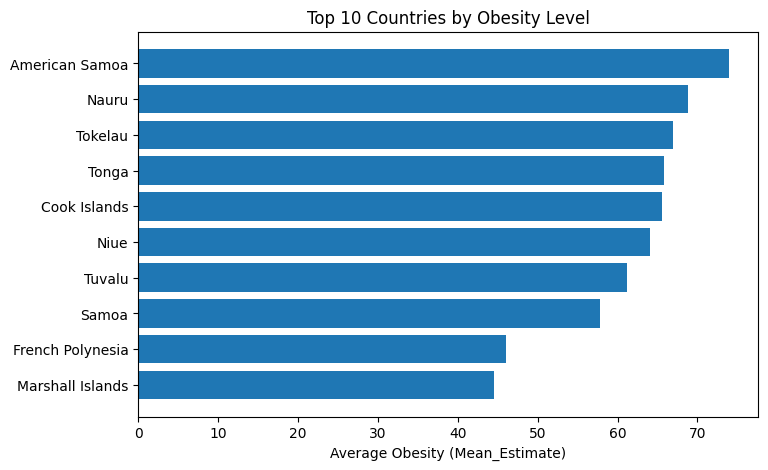

In [27]:
#top 10 countries with obesity level

import matplotlib.pyplot as plt
import pandas as pd

# Top 10 countries
top_10_countries = (
    df_obesity.groupby("Country")["Mean_Estimate"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(8,5))
plt.barh(top_10_countries.index, top_10_countries.values)
plt.xlabel("Average Obesity (Mean_Estimate)")
plt.title("Top 10 Countries by Obesity Level")
plt.gca().invert_yaxis()
plt.show()


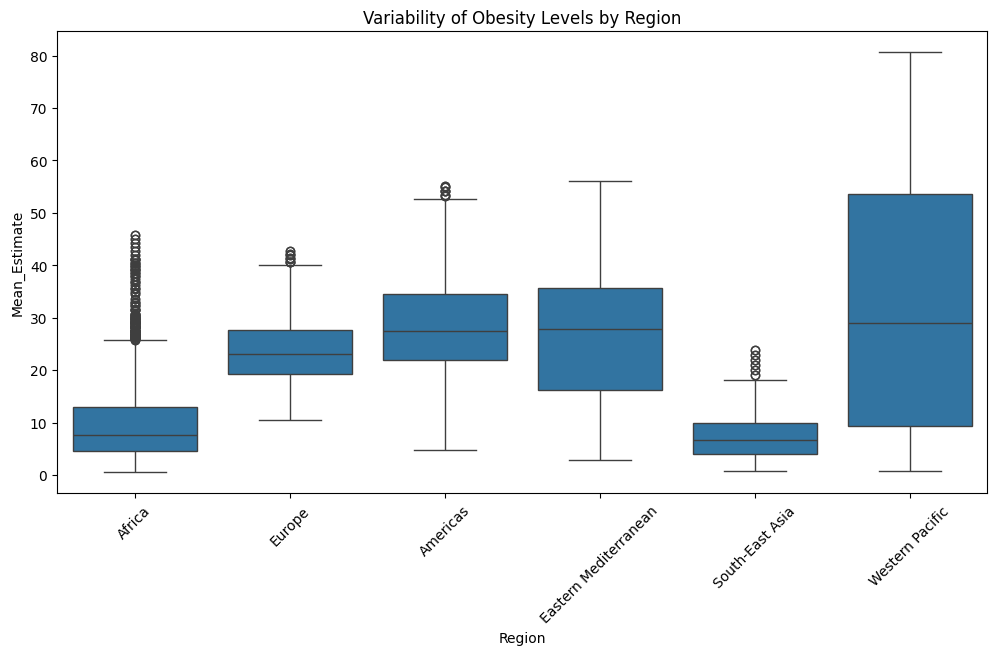

In [28]:
#Observe Variability by Region

import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_obesity,
    x="Region",
    y="Mean_Estimate"
)
plt.xticks(rotation=45)
plt.title("Variability of Obesity Levels by Region")
plt.ylabel("Mean_Estimate")
plt.xlabel("Region")
plt.show()


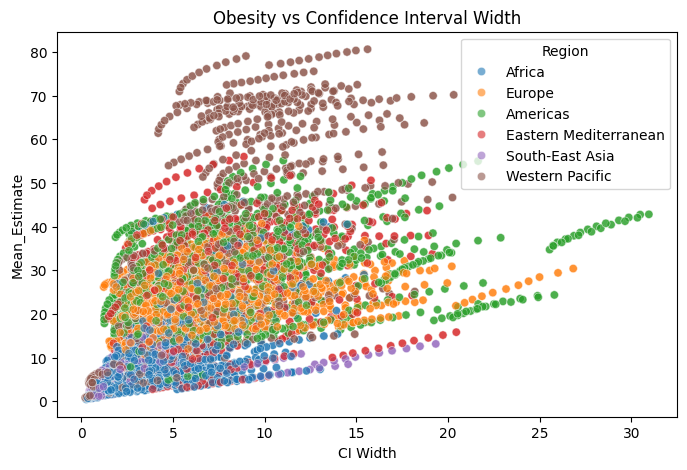

In [29]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_obesity,
    x="CI_Width",
    y="Mean_Estimate",
    hue="Region",
    alpha=0.6
)
plt.title("Obesity vs Confidence Interval Width")
plt.xlabel("CI Width")
plt.ylabel("Mean_Estimate")
plt.show()


In [30]:
df_obesity

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,obesity_level
0,Africa,Both,2022,7.699381,12.761527,9.952872,Mali,adult,5.062146,Low
4,Europe,Male,2014,25.753903,31.737372,28.709593,Ireland,adult,5.983469,Moderate
19,Europe,Female,2022,23.676629,41.304097,32.159114,Lithuania,adult,17.627468,High
21,Americas,Both,2014,34.908265,46.248028,40.481207,Saint Kitts and Nevis,adult,11.339763,High
24,Europe,Male,2021,21.260272,29.394928,25.170892,Türkiye,adult,8.134656,Moderate
...,...,...,...,...,...,...,...,...,...,...
41572,Europe,Male,2017,13.105536,19.582826,16.202195,Armenia,children,6.477290,Low
41573,Africa,Male,2014,1.238242,3.714840,2.228189,Madagascar,children,2.476598,Low
41577,Americas,Both,2015,30.062485,31.938758,31.007463,Mexico,children,1.876273,High
41578,Western Pacific,Female,2013,3.959341,4.561742,4.257298,"Korea, Republic of",children,0.602401,Low


In [31]:
import sqlite3

# Connect to SQLite database (creates if not exists)
conn = sqlite3.connect("nutrition.db")
cursor = conn.cursor()

# Create obesity table
cursor.execute("""
CREATE TABLE IF NOT EXISTS obesity (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    Region TEXT,
    Gender TEXT,
    Year INTEGER,
    LowerBound REAL,
    UpperBound REAL,
    Mean_Estimate REAL,
    Country TEXT,
    age_group TEXT,
    CI_Width REAL,
    obesity_level TEXT
)
""")

# Create malnutrition table
cursor.execute("""
CREATE TABLE IF NOT EXISTS malnutrition (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    Region TEXT,
    Gender TEXT,
    Year INTEGER,
    LowerBound REAL,
    UpperBound REAL,
    Mean_Estimate REAL,
    Country TEXT,
    age_group TEXT,
    CI_Width REAL,
    malnutrition_level TEXT
)
""")

conn.commit()
cursor.close()
conn.close()


In [32]:

conn = sqlite3.connect("nutrition.db")
cursor = conn.cursor()

for index, row in df_obesity.iterrows():
    cursor.execute("""
        INSERT INTO obesity (
            Region, Gender, Year, LowerBound, UpperBound, Mean_Estimate,
            Country, age_group, CI_Width, obesity_level
        ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    """, (
        row['Region'], row['Gender'], row['Year'], row['LowerBound'],
        row['UpperBound'], row['Mean_Estimate'], row['Country'],
        row['age_group'], row['CI_Width'], row['obesity_level']
    ))


for index, row in df_malnutrition.iterrows():
    cursor.execute("""
        INSERT INTO malnutrition (
            Region, Gender, Year, LowerBound, UpperBound, Mean_Estimate,
            Country, age_group, CI_Width, malnutrition_level
        ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    """, (
        row['Region'], row['Gender'], row['Year'], row['LowerBound'],
        row['UpperBound'], row['Mean_Estimate'], row['Country'],
        row['age_group'], row['CI_Width'], row['malnutrition_level']
    ))


conn.commit()
cursor.close()
conn.close()


In [33]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("nutrition.db")


In [34]:
#1️Top 5 regions with highest average obesity (most recent year = 2022)

query = """
SELECT Region, AVG(Mean_Estimate) AS avg_obesity
FROM obesity
WHERE Year = 2022
GROUP BY Region
ORDER BY avg_obesity DESC
LIMIT 5;
"""
pd.read_sql(query, conn)


,Region,avg_obesity
0,Western Pacific,34.925811
1,Americas,31.948816
2,Eastern Mediterranean,29.460886
3,Europe,25.594021
4,None,17.644603


In [35]:
#2 Top 5 countries with highest obesity estimates

query = """
SELECT Country, AVG(Mean_Estimate) AS avg_obesity
FROM obesity
GROUP BY Country
ORDER BY avg_obesity DESC
LIMIT 5;
"""
pd.read_sql(query, conn)


,Country,avg_obesity
0,American Samoa,73.911873
1,Nauru,68.841421
2,Tokelau,66.909617
3,Tonga,65.869463
4,Cook Islands,65.569978


In [36]:
#3 Obesity trend in India over the years(Mean_estimate)

query = """
SELECT Year, AVG(Mean_Estimate) AS avg_obesity
FROM obesity
WHERE Country = 'India'
GROUP BY Year
ORDER BY Year;
"""
india_trend = pd.read_sql(query, conn)
india_trend


,Year,avg_obesity
0,2012,3.990934
1,2013,4.246041
2,2014,4.515420
3,2015,4.803964
4,2016,5.110814
5,2017,5.433442
6,2018,5.768357
7,2019,6.115334
8,2020,6.475302
9,2021,6.851042


In [37]:
#4 Average obesity by gender
query = """
SELECT Gender, AVG(Mean_Estimate) AS avg_obesity
FROM obesity
GROUP BY Gender;
"""
pd.read_sql(query, conn)


,Gender,avg_obesity
0,Both,21.847116
1,Female,25.526957
2,Male,18.125596


In [38]:
#5 Country count by obesity level category and age group
query = """
SELECT obesity_level, age_group, COUNT(DISTINCT Country) AS country_count
FROM obesity
GROUP BY obesity_level, age_group
ORDER BY obesity_level, age_group;
"""
pd.read_sql(query, conn)


,obesity_level,age_group,country_count
0,High,adult,94
1,High,children,94
2,Low,adult,176
3,Low,children,176
4,Moderate,adult,99
5,Moderate,children,99


In [39]:
#6 Top 5 countries least reliable countries(with highest CI_Width)  and Top 5 most consistent countries (smallest average CI_Width)
# Least reliable
query_high_ci = """
SELECT Country, AVG(CI_Width) AS avg_ci
FROM obesity
GROUP BY Country
ORDER BY avg_ci DESC
LIMIT 5;
"""
pd.read_sql(query_high_ci, conn)


,Country,avg_ci
0,Bermuda,22.814264
1,Antigua and Barbuda,22.495768
2,North Macedonia,17.885578
3,Saint Kitts and Nevis,16.290263
4,Cyprus,13.424304


In [40]:
# Most consistent
query_low_ci = """
SELECT Country, AVG(CI_Width) AS avg_ci
FROM obesity
GROUP BY Country
ORDER BY avg_ci ASC
LIMIT 5;
"""
pd.read_sql(query_low_ci, conn)


,Country,avg_ci
0,Global,0.546046
1,Low & Middle Income,0.689793
2,Viet Nam,0.700171
3,Ethiopia,0.822369
4,South-East Asia Region,0.839379


In [41]:
#7 Average obesity by age group
query = """
SELECT age_group, AVG(Mean_Estimate) AS avg_obesity
FROM obesity
GROUP BY age_group
ORDER BY avg_obesity DESC;
"""
pd.read_sql(query, conn)


,age_group,avg_obesity
0,children,21.833223
1,adult,21.833223


In [42]:
#8 Top 10 Countries with consistent low obesity (low average + low CI)over the years
query = """
SELECT Country,
       AVG(Mean_Estimate) AS avg_obesity,
       AVG(CI_Width) AS avg_ci
FROM obesity
WHERE age_group='adult' AND Gender='Both'
GROUP BY Country
HAVING avg_obesity < 25 AND avg_ci < 5
ORDER BY avg_obesity, avg_ci
LIMIT 10;
"""
pd.read_sql(query, conn)


,Country,avg_obesity,avg_ci
0,Viet Nam,1.377237,0.551192
1,Timor-Leste,1.574873,0.816118
2,Ethiopia,1.740915,0.699664
3,Madagascar,2.837363,1.933979
4,Cambodia,3.159730,1.011106
5,Eritrea,3.164789,2.065544
6,Rwanda,3.241853,0.881175
7,Burundi,3.403117,3.654136
8,Bangladesh,3.767189,0.873616
9,Japan,4.273680,0.870474


In [43]:
#9 Countries where female obesity exceeds male by large margin (same year)
query = """
SELECT f.Country, f.Year,
       (f.Mean_Estimate - m.Mean_Estimate) AS obesity_gap
FROM obesity f
JOIN obesity m
ON f.Country = m.Country
AND f.Year = m.Year
WHERE f.Gender = 'Female'
AND m.Gender = 'Male'
AND (f.Mean_Estimate - m.Mean_Estimate) > 5
ORDER BY obesity_gap DESC;
"""
pd.read_sql(query, conn)



,Country,Year,obesity_gap
0,South Africa,2022,32.976921
1,South Africa,2022,32.976921
2,South Africa,2022,32.976921
3,South Africa,2022,32.976921
4,South Africa,2021,32.315237
...,...,...,...
5551,Kazakhstan,2017,5.017734
5552,Guinea,2017,5.000043
5553,Guinea,2017,5.000043
5554,Guinea,2017,5.000043


In [44]:
#10 Global average obesity percentage per year
query = """
SELECT Year, AVG(Mean_Estimate) AS global_avg_obesity
FROM obesity
GROUP BY Year
ORDER BY Year;
"""
global_trend = pd.read_sql(query, conn)
global_trend


,Year,global_avg_obesity
0,2012,19.517937
1,2013,19.949264
2,2014,20.391706
3,2015,20.847085
4,2016,21.315222
5,2017,21.790270
6,2018,22.269403
7,2019,22.757322
8,2020,23.262192
9,2021,23.777187


# malnutrition

In [45]:
#1 Avg. malnutrition by age group
pd.read_sql("""
SELECT age_group, AVG(Mean_Estimate) avg_malnutrition
FROM malnutrition
GROUP BY age_group;
""", conn)


,age_group,avg_malnutrition
0,Adolescent,21.833223
1,child,21.833223


In [46]:
#2 Top 5 countries with highest malnutrition
pd.read_sql("""
SELECT Country, AVG(Mean_Estimate) avg_malnutrition
FROM malnutrition
GROUP BY Country
ORDER BY avg_malnutrition DESC
LIMIT 5;
""", conn)


,Country,avg_malnutrition
0,American Samoa,73.911873
1,Nauru,68.841421
2,Tokelau,66.909617
3,Tonga,65.869463
4,Cook Islands,65.569978


In [47]:
#3 Malnutrition trend in African region over the years
pd.read_sql("""
SELECT Year, AVG(Mean_Estimate) avg_malnutrition
FROM malnutrition
WHERE Region='Africa'
GROUP BY Year
ORDER BY Year;
""", conn)


,Year,avg_malnutrition
0,2012,8.430449
1,2013,8.717518
2,2014,9.019804
3,2015,9.339158
4,2016,9.679556
5,2017,10.040415
6,2018,10.417488
7,2019,10.810455
8,2020,11.218692
9,2021,11.641035


In [48]:
#4 Gender-based average malnutrition
pd.read_sql("""
SELECT Gender, AVG(Mean_Estimate) avg_malnutrition
FROM malnutrition
GROUP BY Gender;
""", conn)


,Gender,avg_malnutrition
0,Both,21.847116
1,Female,25.526957
2,Male,18.125596


In [49]:
#5 Malnutrition level-wise (average CI_Width by age group)
pd.read_sql("""
SELECT age_group, malnutrition_level, AVG(CI_Width) avg_ci
FROM malnutrition
GROUP BY age_group, malnutrition_level;
""", conn)


,age_group,malnutrition_level,avg_ci
0,Adolescent,High,7.796332
1,Adolescent,Low,2.791617
2,Adolescent,Moderate,5.235805
3,child,High,7.796332
4,child,Low,2.791617
5,child,Moderate,5.235805


In [50]:
#6 Yearly malnutrition change in specific countries(India, Nigeria, Brazil)
pd.read_sql("""
SELECT Country, Year, AVG(Mean_Estimate) avg_malnutrition
FROM malnutrition
WHERE Country IN ('India','Nigeria','Brazil')
GROUP BY Country, Year
ORDER BY Country, Year;
""", conn)


,Country,Year,avg_malnutrition
0,Brazil,2012,18.951262
1,Brazil,2013,19.822821
2,Brazil,2014,20.727586
3,Brazil,2015,21.659534
4,Brazil,2016,22.613558
5,Brazil,2017,23.582704
6,Brazil,2018,24.568042
7,Brazil,2019,25.569577
8,Brazil,2020,26.590679
9,Brazil,2021,27.628377


In [51]:
#7 Regions with lowest average malnutrition
pd.read_sql("""
SELECT Region, AVG(Mean_Estimate) avg_malnutrition
FROM malnutrition
GROUP BY Region
ORDER BY avg_malnutrition
LIMIT 5;
""", conn)


,Region,avg_malnutrition
0,South-East Asia,7.380458
1,Africa,10.126644
2,None,15.443924
3,Europe,23.484943
4,Eastern Mediterranean,26.412976


In [52]:
#8️ Countries with increasing malnutrition
pd.read_sql("""
SELECT Country,
       MIN(Mean_Estimate) min_mal,
       MAX(Mean_Estimate) max_mal
FROM malnutrition
GROUP BY Country
HAVING max_mal > min_mal;
""", conn)


,Country,min_mal,max_mal
0,Afghanistan,7.454780,21.790805
1,Africa,4.294836,15.317741
2,Albania,15.698056,29.836097
3,Algeria,10.642583,32.929629
4,American Samoa,67.821503,80.609250
...,...,...,...
205,Viet Nam,0.726287,2.189432
206,Western Pacific Region,4.673279,8.578239
207,Yemen,5.532540,14.225826
208,Zambia,2.086749,14.426999


In [53]:
#9 Year-wise Min vs Max malnutrition comparison
pd.read_sql("""
SELECT Year,
       MIN(Mean_Estimate) min_malnutrition,
       MAX(Mean_Estimate) max_malnutrition
FROM malnutrition
GROUP BY Year
ORDER BY Year;
""", conn)


,Year,min_malnutrition,max_malnutrition
0,2012,0.474676,76.983809
1,2013,0.494852,77.297693
2,2014,0.517613,77.641147
3,2015,0.543842,78.009105
4,2016,0.574453,78.395933
5,2017,0.609762,78.800446
6,2018,0.650237,79.205018
7,2019,0.696468,79.600513
8,2020,0.749153,79.969907
9,2021,0.808487,80.316889


In [54]:
#10 High CI_Width flags
pd.read_sql("""
SELECT Country, Year, CI_Width
FROM malnutrition
WHERE CI_Width > 5
ORDER BY CI_Width DESC;
""", conn)


,Country,Year,CI_Width
0,Antigua and Barbuda,2022,30.962974
1,Antigua and Barbuda,2022,30.962974
2,Bermuda,2022,30.489325
3,Bermuda,2022,30.489325
4,Antigua and Barbuda,2021,30.341634
...,...,...,...
7069,Netherlands,2015,5.005959
7070,Oman,2017,5.005410
7071,Oman,2017,5.005410
7072,Afghanistan,2012,5.001972


# join queries

In [55]:
#1️ Obesity vs Malnutrition comparison by country (any 5 countries)
pd.read_sql("""
SELECT o.Country,
       AVG(o.Mean_Estimate) avg_obesity,
       AVG(m.Mean_Estimate) avg_malnutrition
FROM obesity o
JOIN malnutrition m
ON o.Country=m.Country AND o.Year=m.Year
WHERE o.Country IN ('India','China','USA','Nigeria','Brazil')
GROUP BY o.Country;
""", conn)


,Country,avg_obesity,avg_malnutrition
0,Brazil,23.672628,23.672628
1,China,6.287457,6.287457
2,India,5.504829,5.504829
3,Nigeria,9.128517,9.128517


In [56]:
#2 Gender-based disparity in obesity vs malnutrition
pd.read_sql("""
SELECT o.Gender,
       AVG(o.Mean_Estimate) avg_obesity,
       AVG(m.Mean_Estimate) avg_malnutrition
FROM obesity o
JOIN malnutrition m
ON o.Gender=m.Gender AND o.Year=m.Year
GROUP BY o.Gender;
""", conn)


,Gender,avg_obesity,avg_malnutrition
0,Both,21.847116,21.847116
1,Female,25.526957,25.526957
2,Male,18.125596,18.125596


In [57]:
#3 Region-wise avg estimates side-by-side(Africa and America)
pd.read_sql("""
SELECT o.Region,
       AVG(o.Mean_Estimate) avg_obesity,
       AVG(m.Mean_Estimate) avg_malnutrition
FROM obesity o
JOIN malnutrition m
ON o.Region=m.Region AND o.Year=m.Year
WHERE o.Region IN ('Africa','Americas')
GROUP BY o.Region;
""", conn)


,Region,avg_obesity,avg_malnutrition
0,Africa,10.126644,10.126644
1,Americas,28.425830,28.425830


In [58]:
#4 Countries with obesity up & malnutrition down
pd.read_sql("""
SELECT Country,
       obesity_change,
       malnutrition_change
FROM (
    SELECT o.Country,
           MAX(o.Mean_Estimate) - MIN(o.Mean_Estimate) AS obesity_change,
           MIN(m.Mean_Estimate) - MAX(m.Mean_Estimate) AS malnutrition_change
    FROM obesity o
    JOIN malnutrition m
    ON o.Country = m.Country AND o.Year = m.Year
    GROUP BY o.Country
)
WHERE obesity_change > 0 AND malnutrition_change > 0;
""", conn)


,Country,obesity_change,malnutrition_change


In [59]:
#5 Age-wise trend analysis
pd.read_sql("""
SELECT age_group,
       AVG(avg_obesity) AS avg_obesity,
       AVG(avg_malnutrition) AS avg_malnutrition
FROM (
    SELECT age_group, AVG(Mean_Estimate) AS avg_obesity, NULL AS avg_malnutrition
    FROM obesity
    GROUP BY age_group
    UNION ALL
    SELECT age_group, NULL, AVG(Mean_Estimate)
    FROM malnutrition
    GROUP BY age_group
)
GROUP BY age_group;
""", conn)



,age_group,avg_obesity,avg_malnutrition
0,Adolescent,NaN,21.833223
1,adult,21.833223,NaN
2,child,NaN,21.833223
3,children,21.833223,NaN
